## Basic Assumption (down확률 10%)

{'Dual-sourcing': [np.float64(126073.45), np.float64(129717.5), np.float64(130895.075)], 'inventory-strategy': [np.float64(122799.60384619773), np.float64(129771.10749991465), np.float64(132901.7082692948)], 'Wholesale': [np.float64(121149.8), np.float64(121231.95), np.float64(121486.8)]}


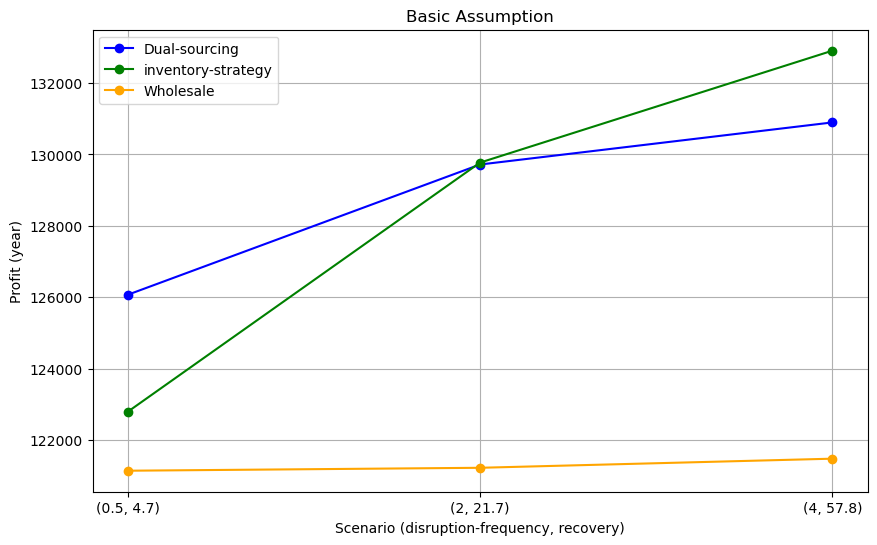

In [60]:
# 확인용용
import pandas as pd
import matplotlib.pyplot as plt

# 파일 이름 리스트
file_names = [
    "Data_Dual-sourcing_0.5_4.7_0.1.csv",
    "Data_Dual-sourcing_2_21.7_0.1.csv",
    "Data_Dual-sourcing_4_57.8_0.1.csv",
    "Data_inventory-strategy_0.5_4.7_0.1.csv",
    "Data_inventory-strategy_2_21.7_0.1.csv",
    "Data_inventory-strategy_4_57.8_0.1.csv",
    "Data_Wholesale_0.5_4.7_0.1.csv",
    "Data_Wholesale_2_21.7_0.1.csv",
    "Data_Wholesale_4_57.8_0.1.csv",
]

# 라벨과 x축 정보
labels = ["Dual-sourcing", "inventory-strategy", "Wholesale"]
x_ticks = [(0.5, 4.7), (2, 21.6), (4, 57.8)]

# 색상 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}

# 데이터를 저장할 딕셔너리
data = {label: [] for label in labels}

# 파일에서 profit의 마지막 값을 추출
for file_name in file_names:
    # CSV 파일 읽기
    df = pd.read_csv(file_name)
    
    # profit 열의 마지막 값 가져오기
    last_profit = df['profit'].iloc[-1]
    last_profit = last_profit / 1000

    # 라벨에 따라 값 추가
    if "Dual-sourcing" in file_name:
        data["Dual-sourcing"].append(last_profit)
    elif "inventory-strategy" in file_name:
        data["inventory-strategy"].append(last_profit)
    elif "Wholesale" in file_name:
        data["Wholesale"].append(last_profit)

print(data)
# 라인 플롯 생성
plt.figure(figsize=(10, 6))

for label in labels:
    plt.plot(["(0.5, 4.7)", "(2, 21.7)", "(4, 57.8)"], data[label], marker='o', label=label, color=colors[label])

# 플롯 꾸미기
plt.title("Basic Assumption")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()

# h를 5에서 10으로 바꿈 
# exercise-cost를 30에서 25로 바꿈꿈

{'Dual-sourcing': [np.float64(4.064100807430136), np.float64(6.999433730134674), np.float64(7.744277567604048)], 'inventory-strategy': [np.float64(1.3617883365863803), np.float64(7.0436526838961635), np.float64(9.396007030636074)]}


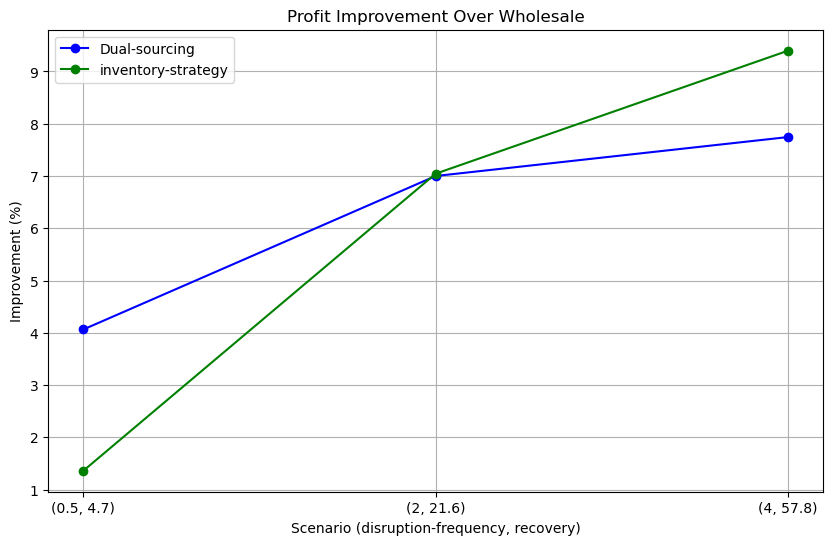

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 이름 리스트
file_names = [
    "Data_Dual-sourcing_0.5_4.7_0.1.csv",
    "Data_Dual-sourcing_2_21.7_0.1.csv",
    "Data_Dual-sourcing_4_57.8_0.1.csv",
    "Data_inventory-strategy_0.5_4.7_0.1.csv",
    "Data_inventory-strategy_2_21.7_0.1.csv",
    "Data_inventory-strategy_4_57.8_0.1.csv",
    "Data_Wholesale_0.5_4.7_0.1.csv",
    "Data_Wholesale_2_21.7_0.1.csv",
    "Data_Wholesale_4_57.8_0.1.csv",
]


# 라벨과 x축 정보
labels = ["Dual-sourcing", "inventory-strategy", "Wholesale"]
x_ticks = [(0.5, 4.7), (2, 21.6), (4, 57.8)]

# 색상 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}

# 데이터를 저장할 딕셔너리
data = {label: [] for label in labels}

# 파일에서 profit의 마지막 값을 추출
for file_name in file_names:
    # CSV 파일 읽기
    df = pd.read_csv(file_name)
    
    # profit 열의 마지막 값 가져오기
    last_profit = df['profit'].iloc[-1]
    last_profit = last_profit / 1000

    # 라벨에 따라 값 추가
    if "Dual-sourcing" in file_name:
        data["Dual-sourcing"].append(last_profit)
    elif "inventory-strategy" in file_name:
        data["inventory-strategy"].append(last_profit)
    elif "Wholesale" in file_name:
        data["Wholesale"].append(last_profit)

# 수익 개선 비율 계산
improvement_ratios = {
    "Dual-sourcing": [],
    "inventory-strategy": []
}

for i in range(len(data["Wholesale"])):
    wholesale_profit = data["Wholesale"][i]
    dual_improvement = ((data["Dual-sourcing"][i] - wholesale_profit) / wholesale_profit) * 100
    inventory_improvement = ((data["inventory-strategy"][i] - wholesale_profit) / wholesale_profit) * 100
    improvement_ratios["Dual-sourcing"].append(dual_improvement)
    improvement_ratios["inventory-strategy"].append(inventory_improvement)

print(improvement_ratios)
# 수익 개선 비율 플롯 생성
plt.figure(figsize=(10, 6))

for label in improvement_ratios:
    plt.plot([f"({x[0]}, {x[1]})" for x in x_ticks], improvement_ratios[label], marker='o', label=label, color=colors[label])

# 플롯 꾸미기
plt.title("Profit Improvement Over Wholesale")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Improvement (%)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()

In [27]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("Data_Wholesale_0.5_4.7_0.1.csv")

# True 값 확인
true_values = df['disruption'].value_counts()
print(true_values)

# True 값 비율 확인
true_ratio = df['disruption'].sum() / len(df)
print(f"True 값 비율: {true_ratio:.2%}")

disruption
False    46959
True      5041
Name: count, dtype: int64
True 값 비율: 9.69%


In [24]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("Data_Wholesale_2_21.7_0.1.csv")

# True 값 확인
true_values = df['disruption'].value_counts()
print(true_values)

# True 값 비율 확인
true_ratio = df['disruption'].sum() / len(df)
print(f"True 값 비율: {true_ratio:.2%}")


disruption
False    46970
True      5030
Name: count, dtype: int64
True 값 비율: 9.67%


In [46]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("Data_Wholesale_4_57.8_0.1.csv")

# True 값 확인
true_values = df['disruption'].value_counts()
print(true_values)

# True 값 비율 확인
true_ratio = df['disruption'].sum() / len(df)
print(f"True 값 비율: {true_ratio:.2%}")


disruption
False    47021
True      4979
Name: count, dtype: int64
True 값 비율: 9.57%


## Holding-cost에 따른 변화 (6, 8, 10, 12)

{'Dual-sourcing': [np.float64(126073.45), np.float64(129717.5), np.float64(130895.075)], 'inventory-strategy(6)': [np.float64(125286.44673085495), np.float64(131670.52673065625), np.float64(134033.3273460273)], 'inventory-strategy(8)': [np.float64(123876.78430780413), np.float64(130689.56323089775), np.float64(133457.07446153834)], 'inventory-strategy(10)': [np.float64(122799.60384619773), np.float64(129772.18423081384), np.float64(132902.3998075646)], 'inventory-strategy(12)': [np.float64(121939.93692312062), np.float64(128984.96784628244), np.float64(132393.62915377613)], 'Wholesale': [np.float64(121149.8), np.float64(121231.95), np.float64(121486.8)]}


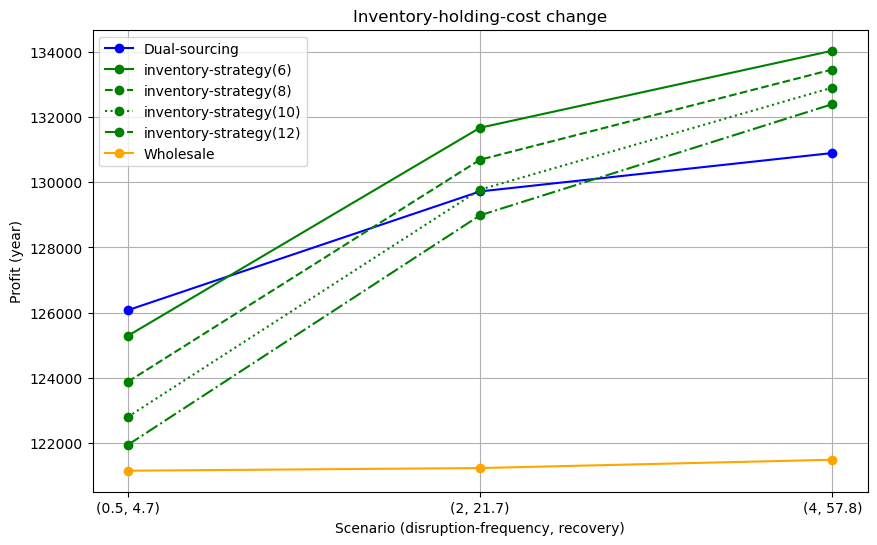

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 이름 리스트
file_names = [
    "Data_Dual-sourcing_0.5_4.7_0.1.csv",
    "Data_Dual-sourcing_2_21.7_0.1.csv",
    "Data_Dual-sourcing_4_57.8_0.1.csv",
    "Data_inventory-strategy_0.5_4.7_0.1_h6.csv",
    "Data_inventory-strategy_2_21.7_0.1_h6.csv",
    "Data_inventory-strategy_4_57.8_0.1_h6.csv",
    "Data_inventory-strategy_0.5_4.7_0.1_h8.csv",
    "Data_inventory-strategy_2_21.7_0.1_h8.csv",
    "Data_inventory-strategy_4_57.8_0.1_h8.csv",
    "Data_inventory-strategy_0.5_4.7_0.1_h10.csv",
    "Data_inventory-strategy_2_21.7_0.1_h10.csv",
    "Data_inventory-strategy_4_57.8_0.1_h10.csv",
    "Data_inventory-strategy_0.5_4.7_0.1_h12.csv",
    "Data_inventory-strategy_2_21.7_0.1_h12.csv",
    "Data_inventory-strategy_4_57.8_0.1_h12.csv",
    "Data_Wholesale_0.5_4.7_0.1.csv",
    "Data_Wholesale_2_21.7_0.1.csv",
    "Data_Wholesale_4_57.8_0.1.csv",
]

# 라벨과 x축 정보
labels = ["Dual-sourcing", "inventory-strategy(6)", "inventory-strategy(8)", "inventory-strategy(10)", "inventory-strategy(12)", "Wholesale"]
x_ticks = ["(0.5, 4.7)", "(2, 21.7)", "(4, 57.8)"]

# 색상 및 스타일 설정
colors = {
    "Dual-sourcing": "blue",
    "inventory-strategy(6)": "green",
    "inventory-strategy(8)": "green",
    "inventory-strategy(10)": "green",
    "inventory-strategy(12)": "green",
    "Wholesale": "orange"
}
linestyles = {
    "Dual-sourcing": "-",
    "inventory-strategy(6)": "-",
    "inventory-strategy(8)": "--",
    "inventory-strategy(10)": ":",
    "inventory-strategy(12)": "-.",
    "Wholesale": "-"
}

# 데이터를 저장할 딕셔너리
data = {label: [] for label in labels}

# 파일에서 profit의 마지막 값을 추출
for file_name in file_names:
    try:
        df = pd.read_csv(file_name)
        last_profit = df['profit'].iloc[-1] / 1000

        if "Dual-sourcing" in file_name:
            data["Dual-sourcing"].append(last_profit)
        elif "inventory-strategy_0.5_4.7_0.1_h6" in file_name or "inventory-strategy_2_21.7_0.1_h6" in file_name or "inventory-strategy_4_57.8_0.1_h6" in file_name:
            data["inventory-strategy(6)"].append(last_profit)
        elif "inventory-strategy_0.5_4.7_0.1_h8" in file_name or "inventory-strategy_2_21.7_0.1_h8" in file_name or "inventory-strategy_4_57.8_0.1_h8" in file_name:
            data["inventory-strategy(8)"].append(last_profit)
        elif "inventory-strategy_0.5_4.7_0.1_h10" in file_name or "inventory-strategy_2_21.7_0.1_h10" in file_name or "inventory-strategy_4_57.8_0.1_h10" in file_name:
            data["inventory-strategy(10)"].append(last_profit)
        elif "inventory-strategy_0.5_4.7_0.1_h12" in file_name or "inventory-strategy_2_21.7_0.1_h12" in file_name or "inventory-strategy_4_57.8_0.1_h12" in file_name:
            data["inventory-strategy(12)"].append(last_profit)
        elif "Wholesale" in file_name:
            data["Wholesale"].append(last_profit)
    except FileNotFoundError:
        print(f"File not found: {file_name}")
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

print(data)

# 라인 플롯 생성
plt.figure(figsize=(10, 6))

for label in labels:
    plt.plot(x_ticks, data[label], marker='o', label=label, color=colors[label], linestyle=linestyles[label])

# 플롯 꾸미기
plt.title("Inventory-holding-cost change")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()


{'Dual-sourcing': [np.float64(4.064100807430136), np.float64(6.999433730134674), np.float64(7.744277567604048)], 'inventory-strategy(6)': [np.float64(3.41448911253254), np.float64(8.610417246160148), np.float64(10.327481953617431)], 'inventory-strategy(8)': [np.float64(2.2509193641294747), np.float64(7.801254727732874), np.float64(9.85314821160681)], 'inventory-strategy(10)': [np.float64(1.3617883365863803), np.float64(7.044540841596499), np.float64(9.396576259778504)], 'inventory-strategy(12)': [np.float64(0.6521982893249672), np.float64(6.3951935494582415), np.float64(8.97778948311761)]}


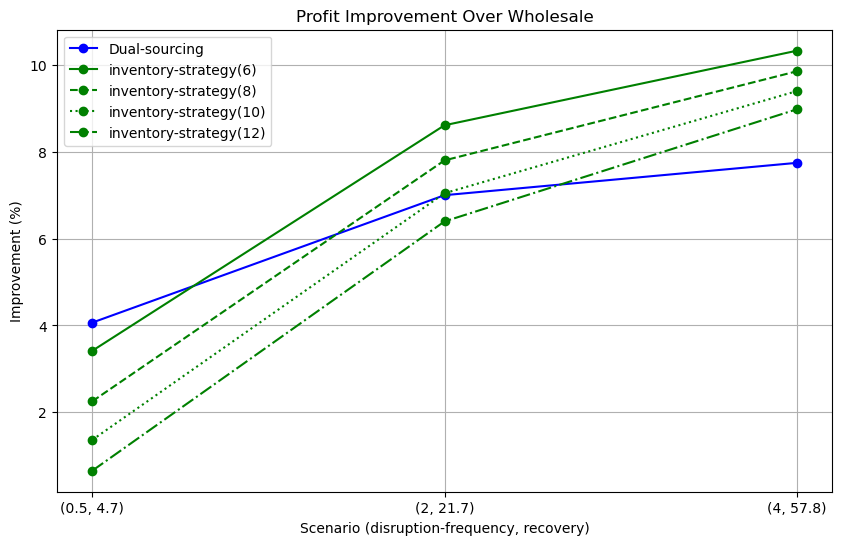

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 이름 리스트
file_names = [
    "Data_Dual-sourcing_0.5_4.7_0.1.csv",
    "Data_Dual-sourcing_2_21.7_0.1.csv",
    "Data_Dual-sourcing_4_57.8_0.1.csv",
    "Data_inventory-strategy_0.5_4.7_0.1_h6.csv",
    "Data_inventory-strategy_2_21.7_0.1_h6.csv",
    "Data_inventory-strategy_4_57.8_0.1_h6.csv",
    "Data_inventory-strategy_0.5_4.7_0.1_h8.csv",
    "Data_inventory-strategy_2_21.7_0.1_h8.csv",
    "Data_inventory-strategy_4_57.8_0.1_h8.csv",
    "Data_inventory-strategy_0.5_4.7_0.1_h10.csv",
    "Data_inventory-strategy_2_21.7_0.1_h10.csv",
    "Data_inventory-strategy_4_57.8_0.1_h10.csv",
    "Data_inventory-strategy_0.5_4.7_0.1_h12.csv",
    "Data_inventory-strategy_2_21.7_0.1_h12.csv",
    "Data_inventory-strategy_4_57.8_0.1_h12.csv",
    "Data_Wholesale_0.5_4.7_0.1.csv",
    "Data_Wholesale_2_21.7_0.1.csv",
    "Data_Wholesale_4_57.8_0.1.csv",
]

# 라벨과 x축 정보
labels = ["Dual-sourcing", "inventory-strategy(6)", "inventory-strategy(8)", "inventory-strategy(10)", "inventory-strategy(12)", "Wholesale"]
x_ticks = ["(0.5, 4.7)", "(2, 21.7)", "(4, 57.8)"]

# 색상 및 스타일 설정
colors = {
    "Dual-sourcing": "blue",
    "inventory-strategy(6)": "green",
    "inventory-strategy(8)": "green",
    "inventory-strategy(10)": "green",
    "inventory-strategy(12)": "green",
    "Wholesale": "orange"
}
linestyles = {
    "Dual-sourcing": "-",
    "inventory-strategy(6)": "-",
    "inventory-strategy(8)": "--",
    "inventory-strategy(10)": ":",
    "inventory-strategy(12)": "-.",
    "Wholesale": "-"
}

# 데이터를 저장할 딕셔너리
data = {label: [] for label in labels}

# 파일에서 profit의 마지막 값을 추출
for file_name in file_names:
    try:
        df = pd.read_csv(file_name)
        last_profit = df['profit'].iloc[-1] / 1000

        if "Dual-sourcing" in file_name:
            data["Dual-sourcing"].append(last_profit)
        elif "inventory-strategy_0.5_4.7_0.1_h6" in file_name or "inventory-strategy_2_21.7_0.1_h6" in file_name or "inventory-strategy_4_57.8_0.1_h6" in file_name:
            data["inventory-strategy(6)"].append(last_profit)
        elif "inventory-strategy_0.5_4.7_0.1_h8" in file_name or "inventory-strategy_2_21.7_0.1_h8" in file_name or "inventory-strategy_4_57.8_0.1_h8" in file_name:
            data["inventory-strategy(8)"].append(last_profit)
        elif "inventory-strategy_0.5_4.7_0.1_h10" in file_name or "inventory-strategy_2_21.7_0.1_h10" in file_name or "inventory-strategy_4_57.8_0.1_h10" in file_name:
            data["inventory-strategy(10)"].append(last_profit)
        elif "inventory-strategy_0.5_4.7_0.1_h12" in file_name or "inventory-strategy_2_21.7_0.1_h12" in file_name or "inventory-strategy_4_57.8_0.1_h12" in file_name:
            data["inventory-strategy(12)"].append(last_profit)
        elif "Wholesale" in file_name:
            data["Wholesale"].append(last_profit)
    except FileNotFoundError:
        print(f"File not found: {file_name}")
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

# 수익 개선 비율 계산
improvement_ratios = {label: [] for label in labels if label != "Wholesale"}

for i in range(len(data["Wholesale"])):
    wholesale_profit = data["Wholesale"][i]
    for label in improvement_ratios:
        improvement = ((data[label][i] - wholesale_profit) / wholesale_profit) * 100
        improvement_ratios[label].append(improvement)

print(improvement_ratios)

# 수익 개선 비율 플롯 생성
plt.figure(figsize=(10, 6))

for label in improvement_ratios:
    plt.plot(x_ticks, improvement_ratios[label], label=label, color=colors[label], linestyle=linestyles[label], marker = "o")

# 플롯 꾸미기
plt.title("Profit Improvement Over Wholesale")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Improvement (%)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()

## reservation-cost 변화 (1, 3, 5, 7)

{'Dual-sourcing(1)': [np.float64(130128.8), np.float64(132108.95), np.float64(132694.05)], 'Dual-sourcing(3)': [np.float64(126073.925), np.float64(129717.825), np.float64(130897.8)], 'Dual-sourcing(5)': [np.float64(123755.7), np.float64(127843.175), np.float64(129388.75)], 'Dual-sourcing(7)': [np.float64(122303.5), np.float64(126319.75), np.float64(128047.025)], 'inventory-strategy': [np.float64(122799.60384619773), np.float64(129771.10749991465), np.float64(132901.7082692948)], 'Wholesale': [np.float64(121149.8), np.float64(121231.95), np.float64(121486.8)]}


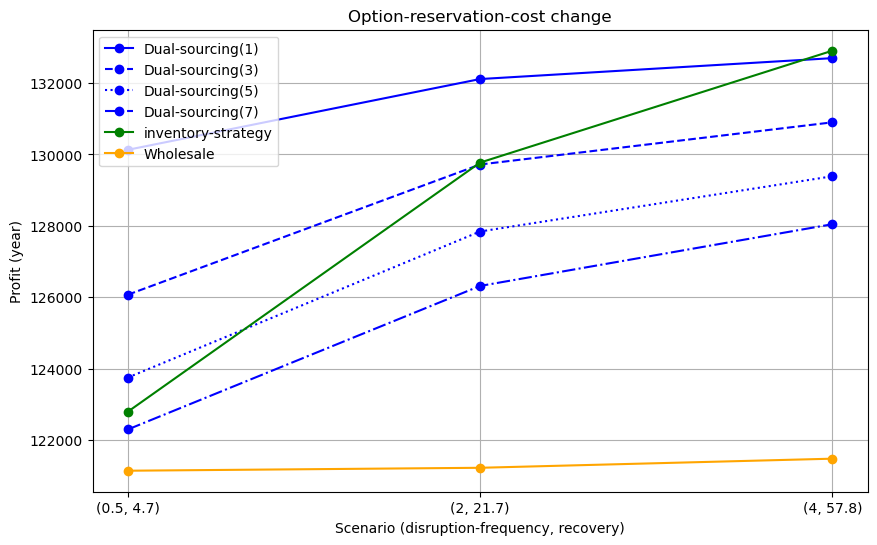

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 이름 리스트
file_names = [
    "Data_Dual-sourcing_0.5_4.7_0.1_r1.csv",
    "Data_Dual-sourcing_2_21.7_0.1_r1.csv",
    "Data_Dual-sourcing_4_57.8_0.1_r1.csv",
    "Data_Dual-sourcing_0.5_4.7_0.1_r3.csv",
    "Data_Dual-sourcing_2_21.7_0.1_r3.csv",
    "Data_Dual-sourcing_4_57.8_0.1_r3.csv",
    "Data_Dual-sourcing_0.5_4.7_0.1_r5.csv",
    "Data_Dual-sourcing_2_21.7_0.1_r5.csv",
    "Data_Dual-sourcing_4_57.8_0.1_r5.csv",
    "Data_Dual-sourcing_0.5_4.7_0.1_r7.csv",
    "Data_Dual-sourcing_2_21.7_0.1_r7.csv",
    "Data_Dual-sourcing_4_57.8_0.1_r7.csv",
    "Data_inventory-strategy_0.5_4.7_0.1.csv",
    "Data_inventory-strategy_2_21.7_0.1.csv",
    "Data_inventory-strategy_4_57.8_0.1.csv",
    "Data_Wholesale_0.5_4.7_0.1.csv",
    "Data_Wholesale_2_21.7_0.1.csv",
    "Data_Wholesale_4_57.8_0.1.csv",
]

# 라벨과 x축 정보
labels = ["Dual-sourcing(1)", "Dual-sourcing(3)", "Dual-sourcing(5)", "Dual-sourcing(7)", "inventory-strategy", "Wholesale"]
x_ticks = ["(0.5, 4.7)", "(2, 21.7)", "(4, 57.8)"]

# 색상 및 스타일 설정
colors = {
    "Dual-sourcing(1)": "blue",
    "Dual-sourcing(3)": "blue",
    "Dual-sourcing(5)": "blue",
    "Dual-sourcing(7)": "blue",
    "inventory-strategy": "green",
    "Wholesale": "orange"
}
linestyles = {
    "Dual-sourcing(1)": "-",
    "Dual-sourcing(3)": "--",
    "Dual-sourcing(5)": ":",
    "Dual-sourcing(7)": "-.",
    "inventory-strategy": "-",
    "Wholesale": "-"
}

# 데이터를 저장할 딕셔너리
data = {label: [] for label in labels}

# 파일에서 profit의 마지막 값을 추출
for file_name in file_names:
    # CSV 파일 읽기
    df = pd.read_csv(file_name)

    # profit 열의 마지막 값 가져오기
    last_profit = df['profit'].iloc[-1]
    last_profit = last_profit / 1000

    # 라벨에 따라 값 추가
    if "Dual-sourcing_0.5_4.7_0.1_r1" in file_name or "Dual-sourcing_2_21.7_0.1_r1" in file_name or "Dual-sourcing_4_57.8_0.1_r1" in file_name:
        data["Dual-sourcing(1)"].append(last_profit)
    elif "Dual-sourcing_0.5_4.7_0.1_r3" in file_name or "Dual-sourcing_2_21.7_0.1_r3" in file_name or "Dual-sourcing_4_57.8_0.1_r3" in file_name:
        data["Dual-sourcing(3)"].append(last_profit)
    elif "Dual-sourcing_0.5_4.7_0.1_r5" in file_name or "Dual-sourcing_2_21.7_0.1_r5" in file_name or "Dual-sourcing_4_57.8_0.1_r5" in file_name:
        data["Dual-sourcing(5)"].append(last_profit)
    elif "Dual-sourcing_0.5_4.7_0.1_r7" in file_name or "Dual-sourcing_2_21.7_0.1_r7" in file_name or "Dual-sourcing_4_57.8_0.1_r7" in file_name:
        data["Dual-sourcing(7)"].append(last_profit)
    elif "inventory-strategy" in file_name:
        data["inventory-strategy"].append(last_profit)
    elif "Wholesale" in file_name:
        data["Wholesale"].append(last_profit)

print(data)

# 라인 플롯 생성
plt.figure(figsize=(10, 6))

for label in labels:
    plt.plot(x_ticks, data[label], marker='o', label=label, color=colors[label], linestyle=linestyles[label])

# 플롯 꾸미기
plt.title("Option-reservation-cost change")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()



{'Dual-sourcing(1)': [np.float64(7.411485615329122), np.float64(8.972057283579135), np.float64(9.225076304586164)], 'Dual-sourcing(3)': [np.float64(4.0644928840163175), np.float64(6.999701811279947), np.float64(7.74652060964648)], 'Dual-sourcing(5)': [np.float64(2.150973422985423), np.float64(5.4533685220769), np.float64(6.504369198958237)], 'Dual-sourcing(7)': [np.float64(0.9522921209940067), np.float64(4.196748464410581), np.float64(5.3999488010219965)], 'inventory-strategy': [np.float64(1.3617883365863803), np.float64(7.0436526838961635), np.float64(9.396007030636074)]}


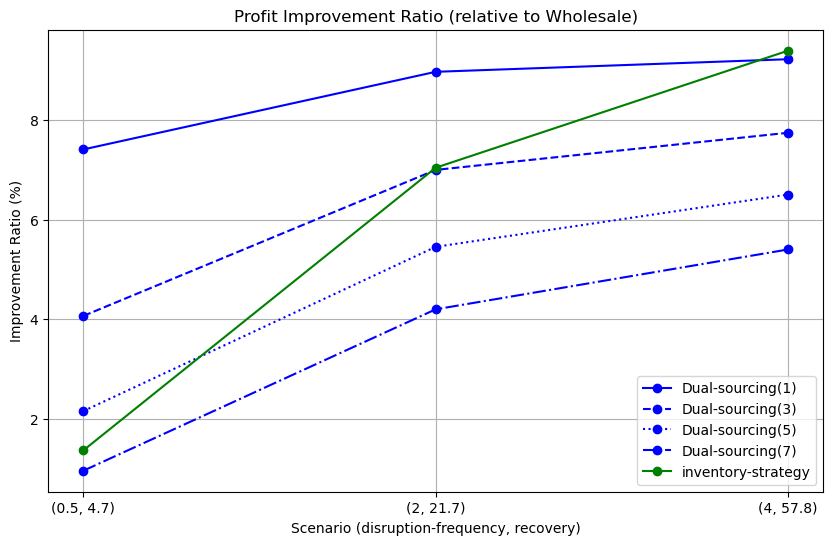

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 이름 리스트
file_names = [
    "Data_Dual-sourcing_0.5_4.7_0.1_r1.csv",
    "Data_Dual-sourcing_2_21.7_0.1_r1.csv",
    "Data_Dual-sourcing_4_57.8_0.1_r1.csv",
    "Data_Dual-sourcing_0.5_4.7_0.1_r3.csv",
    "Data_Dual-sourcing_2_21.7_0.1_r3.csv",
    "Data_Dual-sourcing_4_57.8_0.1_r3.csv",
    "Data_Dual-sourcing_0.5_4.7_0.1_r5.csv",
    "Data_Dual-sourcing_2_21.7_0.1_r5.csv",
    "Data_Dual-sourcing_4_57.8_0.1_r5.csv",
    "Data_Dual-sourcing_0.5_4.7_0.1_r7.csv",
    "Data_Dual-sourcing_2_21.7_0.1_r7.csv",
    "Data_Dual-sourcing_4_57.8_0.1_r7.csv",
    "Data_inventory-strategy_0.5_4.7_0.1.csv",
    "Data_inventory-strategy_2_21.7_0.1.csv",
    "Data_inventory-strategy_4_57.8_0.1.csv",
    "Data_Wholesale_0.5_4.7_0.1.csv",
    "Data_Wholesale_2_21.7_0.1.csv",
    "Data_Wholesale_4_57.8_0.1.csv",
]

# 라벨과 x축 정보
labels = ["Dual-sourcing(1)", "Dual-sourcing(3)", "Dual-sourcing(5)", "Dual-sourcing(7)", "inventory-strategy", "Wholesale"]
x_ticks = ["(0.5, 4.7)", "(2, 21.7)", "(4, 57.8)"]

# 색상 및 스타일 설정
colors = {
    "Dual-sourcing(1)": "blue",
    "Dual-sourcing(3)": "blue",
    "Dual-sourcing(5)": "blue",
    "Dual-sourcing(7)": "blue",
    "inventory-strategy": "green",
    "Wholesale": "orange"
}
linestyles = {
    "Dual-sourcing(1)": "-",
    "Dual-sourcing(3)": "--",
    "Dual-sourcing(5)": ":",
    "Dual-sourcing(7)": "-.",
    "inventory-strategy": "-",
    "Wholesale": "-"
}

# 데이터를 저장할 딕셔너리 (profit 값)
data = {label: [] for label in labels}

# CSV 파일에서 profit의 마지막 값을 추출하여 data 딕셔너리에 저장
for file_name in file_names:
    # CSV 파일 읽기
    df = pd.read_csv(file_name)
    
    # profit 열의 마지막 값 가져오기 (단, 200으로 나눠 스케일 조정)
    last_profit = df['profit'].iloc[-1] / 1000

    # 파일명에 따른 라벨 분류
    if "Dual-sourcing_0.5_4.7_0.1_r1" in file_name or "Dual-sourcing_2_21.7_0.1_r1" in file_name or "Dual-sourcing_4_57.8_0.1_r1" in file_name:
        data["Dual-sourcing(1)"].append(last_profit)
    elif "Dual-sourcing_0.5_4.7_0.1_r3" in file_name or "Dual-sourcing_2_21.7_0.1_r3" in file_name or "Dual-sourcing_4_57.8_0.1_r3" in file_name:
        data["Dual-sourcing(3)"].append(last_profit)
    elif "Dual-sourcing_0.5_4.7_0.1_r5" in file_name or "Dual-sourcing_2_21.7_0.1_r5" in file_name or "Dual-sourcing_4_57.8_0.1_r5" in file_name:
        data["Dual-sourcing(5)"].append(last_profit)
    elif "Dual-sourcing_0.5_4.7_0.1_r7" in file_name or "Dual-sourcing_2_21.7_0.1_r7" in file_name or "Dual-sourcing_4_57.8_0.1_r7" in file_name:
        data["Dual-sourcing(7)"].append(last_profit)
    elif "inventory-strategy" in file_name:
        data["inventory-strategy"].append(last_profit)
    elif "Wholesale" in file_name:
        data["Wholesale"].append(last_profit)

# Wholesale 대비 개선 비율(improvement ratio) 계산
# Wholesale를 기준으로 하므로 Wholesale 라벨은 제외합니다.
improvement_ratios = {label: [] for label in labels if label != "Wholesale"}

# 각 시나리오(즉, x축 인덱스)에 대해 Wholesale 값과 비교하여 개선 비율 계산
for i in range(len(data["Wholesale"])):
    wholesale_profit = data["Wholesale"][i]
    for label in improvement_ratios:
        # 개선 비율 계산: ((해당 전략의 profit - Wholesale profit) / Wholesale profit) * 100
        improvement = ((data[label][i] - wholesale_profit) / wholesale_profit) * 100
        improvement_ratios[label].append(improvement)

print(improvement_ratios)

# 개선 비율을 이용해 라인 플롯 그리기
plt.figure(figsize=(10, 6))

for label in improvement_ratios:
    plt.plot(x_ticks, improvement_ratios[label], marker='o', label=label,
             color=colors[label], linestyle=linestyles[label])

# 플롯 꾸미기
plt.title("Profit Improvement Ratio (relative to Wholesale)")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Improvement Ratio (%)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()


## exercise-cost 변화 (23, 25, 27, 29)

{'Dual-sourcing(23)': [np.float64(126836.996), np.float64(130652.1), np.float64(131850.915)], 'Dual-sourcing(25)': [np.float64(126068.975), np.float64(129717.6), np.float64(130896.925)], 'Dual-sourcing(27)': [np.float64(125345.089), np.float64(128792.135), np.float64(129956.162)], 'Dual-sourcing(29)': [np.float64(124627.19), np.float64(127874.421), np.float64(129019.959)], 'inventory-strategy': [np.float64(122799.60384619773), np.float64(129771.10749991465), np.float64(132901.7082692948)], 'Wholesale': [np.float64(121149.8), np.float64(121231.95), np.float64(121486.8)]}


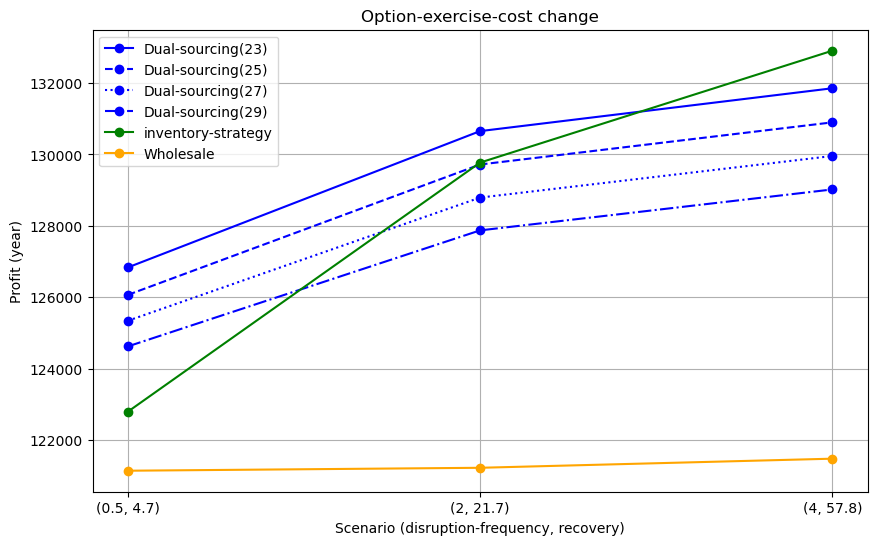

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 이름 리스트 (시나리오 부분을 모두 수정)
file_names = [
    "Data_Dual-sourcing_0.5_4.7_0.1_e23.csv",
    "Data_Dual-sourcing_2_21.7_0.1_e23.csv",
    "Data_Dual-sourcing_4_57.8_0.1_e23.csv",
    "Data_Dual-sourcing_0.5_4.7_0.1_e25.csv",
    "Data_Dual-sourcing_2_21.7_0.1_e25.csv",
    "Data_Dual-sourcing_4_57.8_0.1_e25.csv",
    "Data_Dual-sourcing_0.5_4.7_0.1_e27.csv",
    "Data_Dual-sourcing_2_21.7_0.1_e27.csv",
    "Data_Dual-sourcing_4_57.8_0.1_e27.csv",
    "Data_Dual-sourcing_0.5_4.7_0.1_e29.csv",
    "Data_Dual-sourcing_2_21.7_0.1_e29.csv",
    "Data_Dual-sourcing_4_57.8_0.1_e29.csv",
    "Data_inventory-strategy_0.5_4.7_0.1.csv",
    "Data_inventory-strategy_2_21.7_0.1.csv",
    "Data_inventory-strategy_4_57.8_0.1.csv",
    "Data_Wholesale_0.5_4.7_0.1.csv",
    "Data_Wholesale_2_21.7_0.1.csv",
    "Data_Wholesale_4_57.8_0.1.csv",
]

# 라벨과 x축 정보 (x_ticks 수정됨)
labels = ["Dual-sourcing(23)", "Dual-sourcing(25)", "Dual-sourcing(27)", "Dual-sourcing(29)", "inventory-strategy", "Wholesale"]
x_ticks = ["(0.5, 4.7)", "(2, 21.7)", "(4, 57.8)"]

# 색상 및 스타일 설정
colors = {
    "Dual-sourcing(23)": "blue",
    "Dual-sourcing(25)": "blue",
    "Dual-sourcing(27)": "blue",
    "Dual-sourcing(29)": "blue",
    "inventory-strategy": "green",
    "Wholesale": "orange"
}
linestyles = {
    "Dual-sourcing(23)": "-",
    "Dual-sourcing(25)": "--",
    "Dual-sourcing(27)": ":",
    "Dual-sourcing(29)": "-.",
    "inventory-strategy": "-",
    "Wholesale": "-"
}

# 데이터를 저장할 딕셔너리
data = {label: [] for label in labels}

# 각 CSV 파일에서 profit 열의 마지막 값을 추출 (200으로 나눈 값 사용)
for file_name in file_names:
    try:
        df = pd.read_csv(file_name)
        last_profit = df['profit'].iloc[-1] / 1000
        
        # Dual-sourcing 파일 (조건문에서 시나리오 부분도 수정됨)
        if ("Dual-sourcing_0.5_4.7_0.1_e23" in file_name or 
            "Dual-sourcing_2_21.7_0.1_e23" in file_name or 
            "Dual-sourcing_4_57.8_0.1_e23" in file_name):
            data["Dual-sourcing(23)"].append(last_profit)
        elif ("Dual-sourcing_0.5_4.7_0.1_e25" in file_name or 
              "Dual-sourcing_2_21.7_0.1_e25" in file_name or 
              "Dual-sourcing_4_57.8_0.1_e25" in file_name):
            data["Dual-sourcing(25)"].append(last_profit)
        elif ("Dual-sourcing_0.5_4.7_0.1_e27" in file_name or 
              "Dual-sourcing_2_21.7_0.1_e27" in file_name or 
              "Dual-sourcing_4_57.8_0.1_e27" in file_name):
            data["Dual-sourcing(27)"].append(last_profit)
        elif ("Dual-sourcing_0.5_4.7_0.1_e29" in file_name or 
              "Dual-sourcing_2_21.7_0.1_e29" in file_name or 
              "Dual-sourcing_4_57.8_0.1_e29" in file_name):
            data["Dual-sourcing(29)"].append(last_profit)
        # inventory-strategy 파일 (파일 이름 수정됨)
        elif "inventory-strategy" in file_name:
            data["inventory-strategy"].append(last_profit)
        # Wholesale 파일 (파일 이름 수정됨)
        elif "Wholesale" in file_name:
            data["Wholesale"].append(last_profit)
    except FileNotFoundError:
        print(f"File not found: {file_name}")
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

print(data)

# 라인 플롯 생성
plt.figure(figsize=(10, 6))

for label in labels:
    plt.plot(x_ticks, data[label], marker='o', label=label,
             color=colors[label], linestyle=linestyles[label])

# 플롯 꾸미기
plt.title("Option-exercise-cost change")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

plt.show()


{'Dual-sourcing(23)': [np.float64(4.694350300206848), np.float64(7.770352617441202), np.float64(8.531062633965176)], 'Dual-sourcing(25)': [np.float64(4.060407033276161), np.float64(6.9995162166409175), np.float64(7.74580036678882)], 'Dual-sourcing(27)': [np.float64(3.462893871884233), np.float64(6.236132471679287), np.float64(6.9714257022162025)], 'Dual-sourcing(29)': [np.float64(2.8703225263269103), np.float64(5.479142255816231), np.float64(6.200804531850373)], 'inventory-strategy': [np.float64(1.3617883365863803), np.float64(7.0436526838961635), np.float64(9.396007030636074)]}


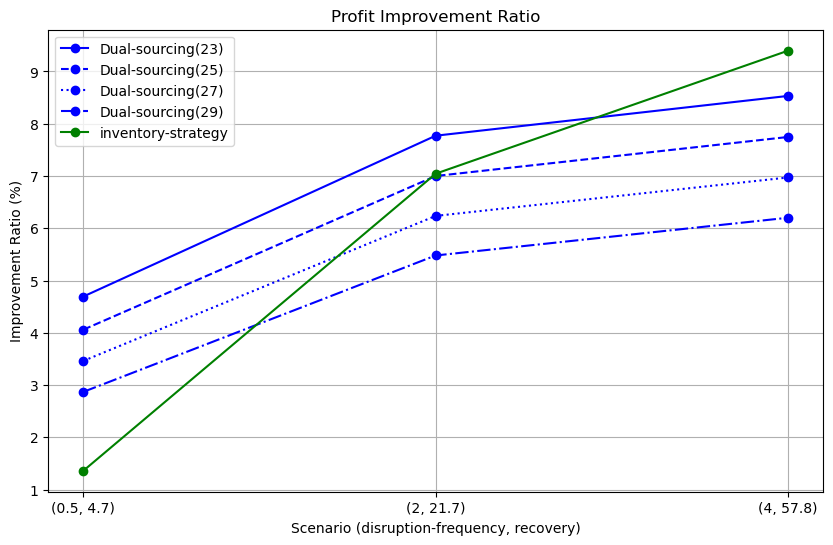

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 이름 리스트 (시나리오 부분 모두 수정됨)
file_names = [
    "Data_Dual-sourcing_0.5_4.7_0.1_e23.csv",
    "Data_Dual-sourcing_2_21.7_0.1_e23.csv",
    "Data_Dual-sourcing_4_57.8_0.1_e23.csv",
    "Data_Dual-sourcing_0.5_4.7_0.1_e25.csv",
    "Data_Dual-sourcing_2_21.7_0.1_e25.csv",
    "Data_Dual-sourcing_4_57.8_0.1_e25.csv",
    "Data_Dual-sourcing_0.5_4.7_0.1_e27.csv",
    "Data_Dual-sourcing_2_21.7_0.1_e27.csv",
    "Data_Dual-sourcing_4_57.8_0.1_e27.csv",
    "Data_Dual-sourcing_0.5_4.7_0.1_e29.csv",
    "Data_Dual-sourcing_2_21.7_0.1_e29.csv",
    "Data_Dual-sourcing_4_57.8_0.1_e29.csv",
    "Data_inventory-strategy_0.5_4.7_0.1.csv",
    "Data_inventory-strategy_2_21.7_0.1.csv",
    "Data_inventory-strategy_4_57.8_0.1.csv",
    "Data_Wholesale_0.5_4.7_0.1.csv",
    "Data_Wholesale_2_21.7_0.1.csv",
    "Data_Wholesale_4_57.8_0.1.csv",
]

# 라벨과 x축 정보 (x_ticks 수정됨)
labels = ["Dual-sourcing(23)", "Dual-sourcing(25)", "Dual-sourcing(27)", "Dual-sourcing(29)", "inventory-strategy", "Wholesale"]
x_ticks = ["(0.5, 4.7)", "(2, 21.7)", "(4, 57.8)"]

# 색상 및 스타일 설정 (원하는 대로 조정)
colors = {
    "Dual-sourcing(23)": "blue",
    "Dual-sourcing(25)": "blue",
    "Dual-sourcing(27)": "blue",
    "Dual-sourcing(29)": "blue",
    "inventory-strategy": "green",
    "Wholesale": "orange"
}
linestyles = {
    "Dual-sourcing(23)": "-",
    "Dual-sourcing(25)": "--",
    "Dual-sourcing(27)": ":",
    "Dual-sourcing(29)": "-.",
    "inventory-strategy": "-",
    "Wholesale": "-"
}

# profit 데이터를 저장할 딕셔너리
data = {label: [] for label in labels}

# 각 CSV 파일에서 profit 열의 마지막 값을 추출 (여기서는 200으로 나눈 값 사용)
for file_name in file_names:
    try:
        df = pd.read_csv(file_name)
        last_profit = df['profit'].iloc[-1] / 1000
        
        # Dual-sourcing 파일 (시나리오 및 'e' 표시된 파일 이름 사용)
        if ("Dual-sourcing_0.5_4.7_0.1_e23" in file_name or 
            "Dual-sourcing_2_21.7_0.1_e23" in file_name or 
            "Dual-sourcing_4_57.8_0.1_e23" in file_name):
            data["Dual-sourcing(23)"].append(last_profit)
        elif ("Dual-sourcing_0.5_4.7_0.1_e25" in file_name or 
              "Dual-sourcing_2_21.7_0.1_e25" in file_name or 
              "Dual-sourcing_4_57.8_0.1_e25" in file_name):
            data["Dual-sourcing(25)"].append(last_profit)
        elif ("Dual-sourcing_0.5_4.7_0.1_e27" in file_name or 
              "Dual-sourcing_2_21.7_0.1_e27" in file_name or 
              "Dual-sourcing_4_57.8_0.1_e27" in file_name):
            data["Dual-sourcing(27)"].append(last_profit)
        elif ("Dual-sourcing_0.5_4.7_0.1_e29" in file_name or 
              "Dual-sourcing_2_21.7_0.1_e29" in file_name or 
              "Dual-sourcing_4_57.8_0.1_e29" in file_name):
            data["Dual-sourcing(29)"].append(last_profit)
        # inventory-strategy 파일
        elif "inventory-strategy" in file_name:
            data["inventory-strategy"].append(last_profit)
        # Wholesale 파일
        elif "Wholesale" in file_name:
            data["Wholesale"].append(last_profit)
    except FileNotFoundError:
        print(f"File not found: {file_name}")
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

improvement_ratios = {label: [] for label in labels if label != "Wholesale"}

for i in range(len(data["Wholesale"])):
    wholesale_profit = data["Wholesale"][i]
    for label in improvement_ratios:
        # 개선율 계산: ((전략 profit - Wholesale profit) / Wholesale profit) * 100
        improvement = ((data[label][i] - wholesale_profit) / wholesale_profit) * 100
        improvement_ratios[label].append(improvement)


print(improvement_ratios)

plt.figure(figsize=(10, 6))
for label in improvement_ratios:
    plt.plot(x_ticks, improvement_ratios[label], marker='o', label=label,
             color=colors[label], linestyle=linestyles[label])
plt.title("Profit Improvement Ratio")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Improvement Ratio (%)")
plt.legend()
plt.grid(True)
plt.show()


## wholesale cost (도매가) (10, 15, 20, 25)

{'Dual-sourcing(10)': [np.float64(179519.125), np.float64(183158.775), np.float64(184356.4)], 'Dual-sourcing(15)': [np.float64(152128.9), np.float64(155771.0), np.float64(156958.0)], 'Dual-sourcing(20)': [np.float64(126075.825), np.float64(129717.75), np.float64(130896.925)], 'Dual-sourcing(25)': [np.float64(99748.625), np.float64(103396.9), np.float64(104568.875)], 'inventory-strategy(10)': [np.float64(178670.71711538464), np.float64(187611.44884615391), np.float64(191097.8932691821)], 'inventory-strategy(15)': [np.float64(149998.27634618134), np.float64(158008.52846159777), np.float64(161322.98865394449)], 'inventory-strategy(20)': [np.float64(122797.03230757099), np.float64(129775.36923083934), np.float64(132902.3998075646)], 'inventory-strategy(25)': [np.float64(95489.33076934921), np.float64(101368.3815385292), np.float64(104243.13307685604)], 'Wholesale(10)': [np.float64(174594.05), np.float64(174673.05), np.float64(174942.95)], 'Wholesale(15)': [np.float64(147202.4), np.float64(

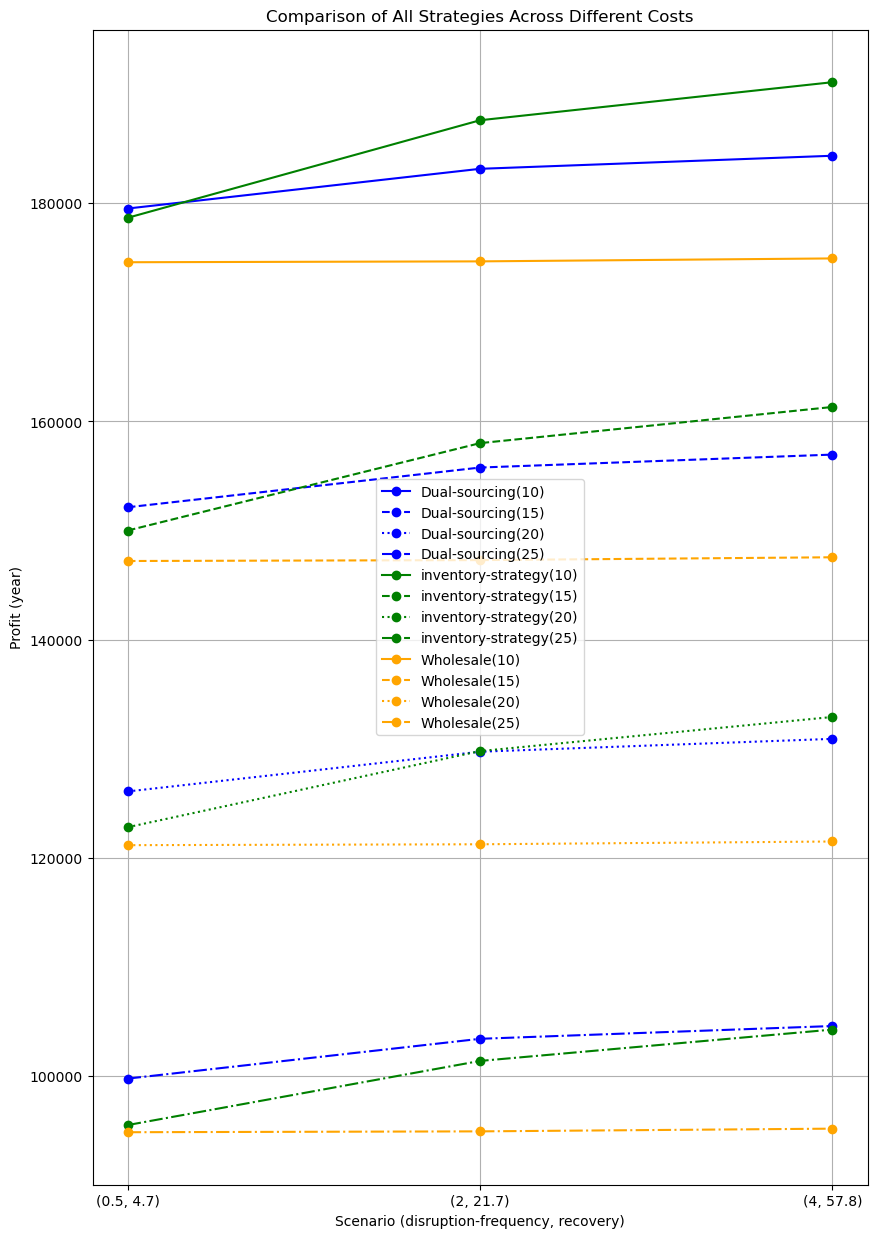

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 4.7), (2, 21.7), (4, 57.8)]
costs = [10, 15, 20, 25]  # ✅ 비용 리스트 업데이트
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {10: "-", 15: "--", 20: ":", 25: "-."}  # ✅ 10, 15, 20, 25 추가

# 데이터를 저장할 딕셔너리
data = {f"{strategy}({cost})": [] for strategy in strategies for cost in costs}

# 데이터 읽기 및 처리
for strategy in strategies:
    for cost in costs:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_0.1_w{cost}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 1000
                data[f"{strategy}({cost})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

print(data)

# 라인 플롯 생성
plt.figure(figsize=(10, 15))

for strategy in strategies:
    for cost in costs:
        label = f"{strategy}({cost})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios], data[label],
                 marker='o', label=label, color=colors[strategy], linestyle=linestyles[cost])

# 플롯 꾸미기
plt.title("Comparison of All Strategies Across Different Costs")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()


{'Dual-sourcing(10)': [np.float64(179519.125), np.float64(183158.775), np.float64(184356.4)], 'inventory-strategy(10)': [np.float64(178670.71711538464), np.float64(187611.44884615391), np.float64(191097.8932691821)], 'Wholesale(10)': [np.float64(174594.05), np.float64(174673.05), np.float64(174942.95)]}


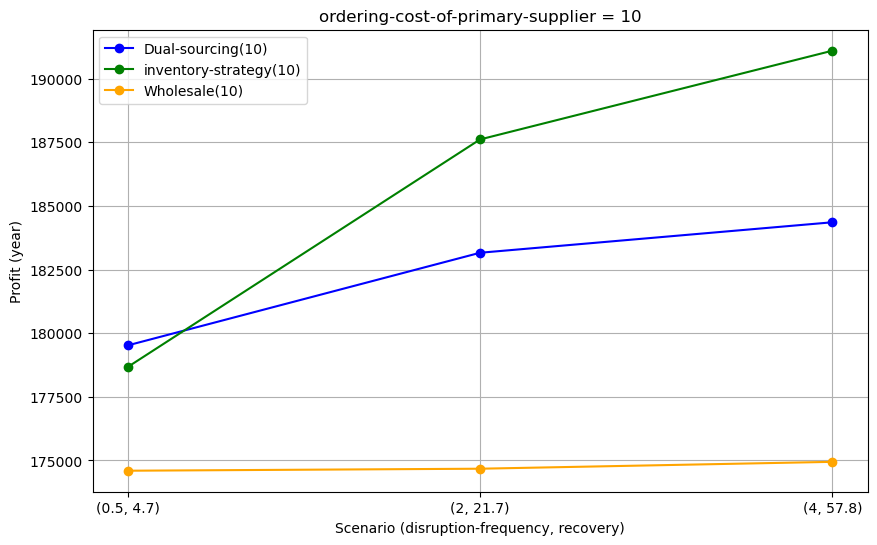

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 4.7), (2, 21.7), (4, 57.8)]
costs = [10] 
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {10: "-", 15: "--", 20: ":", 25: "-."} 

# 데이터를 저장할 딕셔너리
data = {f"{strategy}({cost})": [] for strategy in strategies for cost in costs}

# 데이터 읽기 및 처리
for strategy in strategies:
    for cost in costs:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_0.1_w{cost}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 1000
                data[f"{strategy}({cost})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

print(data)

# 라인 플롯 생성
plt.figure(figsize=(10, 6))

for strategy in strategies:
    for cost in costs:
        label = f"{strategy}({cost})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios], data[label],
                 marker='o', label=label, color=colors[strategy], linestyle=linestyles[cost])

# 플롯 꾸미기
plt.title("ordering-cost-of-primary-supplier = 10")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()

{'Dual-sourcing(15)': [np.float64(152128.9), np.float64(155771.0), np.float64(156958.0)], 'inventory-strategy(15)': [np.float64(149998.27634618134), np.float64(158008.52846159777), np.float64(161322.98865394449)], 'Wholesale(15)': [np.float64(147202.4), np.float64(147285.45), np.float64(147544.55)]}


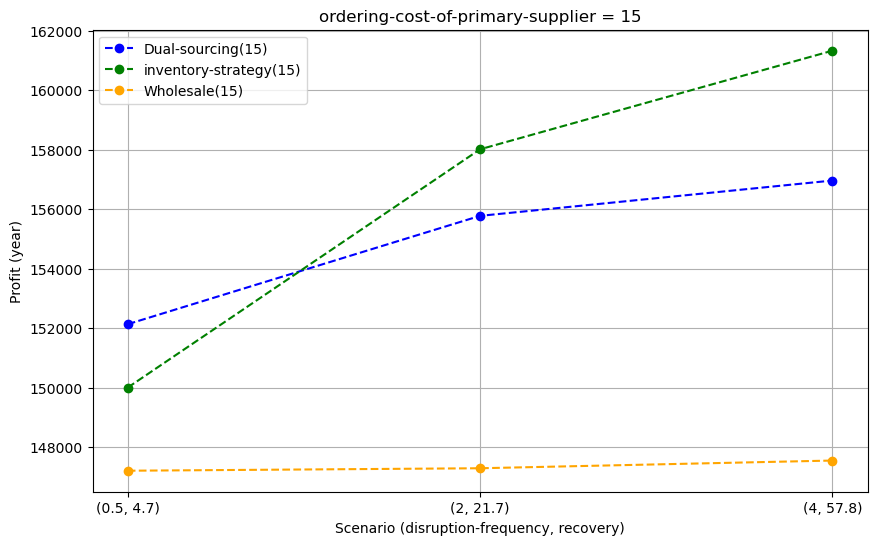

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 4.7), (2, 21.7), (4, 57.8)]
costs = [15] 
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {10: "-", 15: "--", 20: ":", 25: "-."} 

# 데이터를 저장할 딕셔너리
data = {f"{strategy}({cost})": [] for strategy in strategies for cost in costs}

# 데이터 읽기 및 처리
for strategy in strategies:
    for cost in costs:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_0.1_w{cost}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 1000
                data[f"{strategy}({cost})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

print(data)

# 라인 플롯 생성
plt.figure(figsize=(10, 6))

for strategy in strategies:
    for cost in costs:
        label = f"{strategy}({cost})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios], data[label],
                 marker='o', label=label, color=colors[strategy], linestyle=linestyles[cost])

# 플롯 꾸미기
plt.title("ordering-cost-of-primary-supplier = 15")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()

{'Dual-sourcing(20)': [np.float64(126075.825), np.float64(129717.75), np.float64(130896.925)], 'inventory-strategy(20)': [np.float64(122797.03230757099), np.float64(129775.36923083934), np.float64(132902.3998075646)], 'Wholesale(20)': [np.float64(121149.8), np.float64(121231.95), np.float64(121486.8)]}


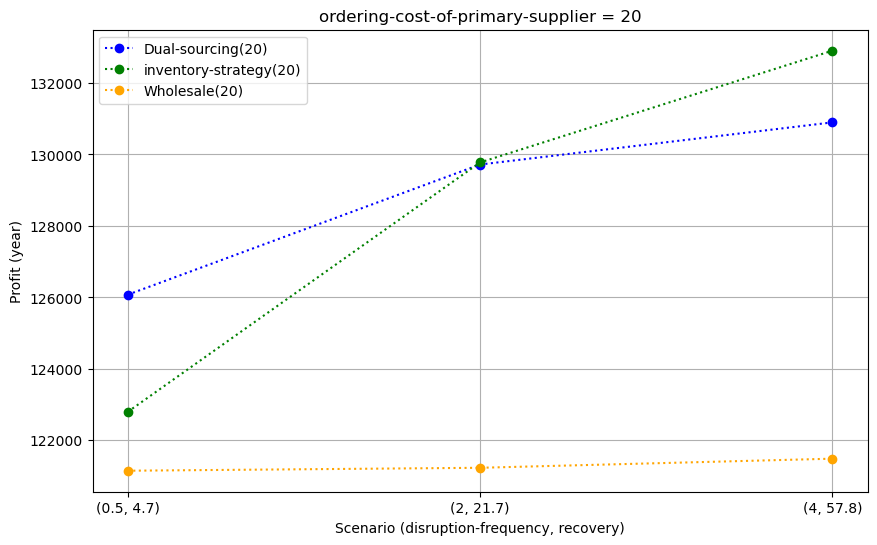

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 4.7), (2, 21.7), (4, 57.8)]
costs = [20] 
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {10: "-", 15: "--", 20: ":", 25: "-."} 

# 데이터를 저장할 딕셔너리
data = {f"{strategy}({cost})": [] for strategy in strategies for cost in costs}

# 데이터 읽기 및 처리
for strategy in strategies:
    for cost in costs:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_0.1_w{cost}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 1000
                data[f"{strategy}({cost})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

print(data)

# 라인 플롯 생성
plt.figure(figsize=(10, 6))

for strategy in strategies:
    for cost in costs:
        label = f"{strategy}({cost})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios], data[label],
                 marker='o', label=label, color=colors[strategy], linestyle=linestyles[cost])

# 플롯 꾸미기
plt.title("ordering-cost-of-primary-supplier = 20")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()

{'Dual-sourcing(25)': [np.float64(99748.625), np.float64(103396.9), np.float64(104568.875)], 'inventory-strategy(25)': [np.float64(95489.33076934921), np.float64(101368.3815385292), np.float64(104243.13307685604)], 'Wholesale(25)': [np.float64(94832.5), np.float64(94910.95), np.float64(95159.65)]}


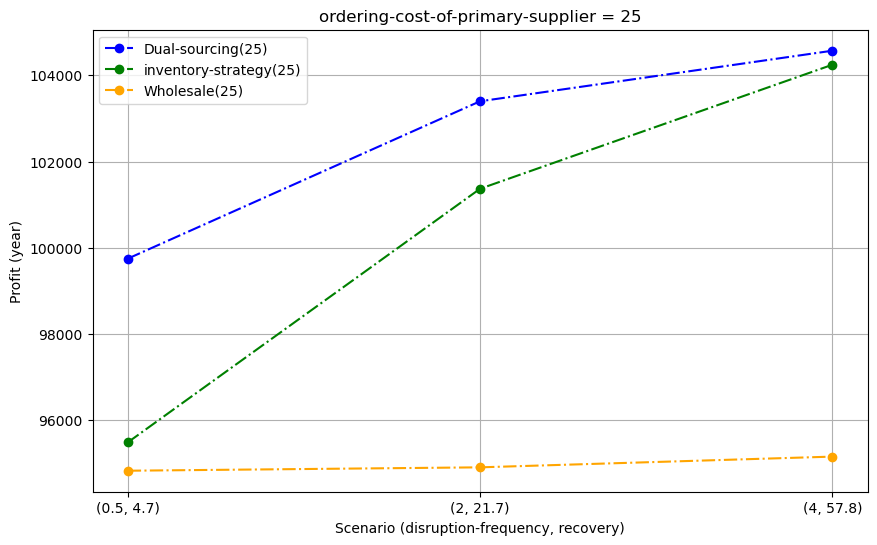

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 4.7), (2, 21.7), (4, 57.8)]
costs = [25] 
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {10: "-", 15: "--", 20: ":", 25: "-."} 

# 데이터를 저장할 딕셔너리
data = {f"{strategy}({cost})": [] for strategy in strategies for cost in costs}

# 데이터 읽기 및 처리
for strategy in strategies:
    for cost in costs:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_0.1_w{cost}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 1000
                data[f"{strategy}({cost})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

print(data)

# 라인 플롯 생성
plt.figure(figsize=(10, 6))

for strategy in strategies:
    for cost in costs:
        label = f"{strategy}({cost})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios], data[label],
                 marker='o', label=label, color=colors[strategy], linestyle=linestyles[cost])

# 플롯 꾸미기
plt.title("ordering-cost-of-primary-supplier = 25")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()

{'Dual-sourcing(10)': [np.float64(2.8208721889434445), np.float64(4.858061962048528), np.float64(5.380868448828593)], 'Dual-sourcing(15)': [np.float64(3.3467524986005666), np.float64(5.761295497959906), np.float64(6.38007300167984)], 'Dual-sourcing(20)': [np.float64(4.066061190361019), np.float64(6.999639946400271), np.float64(7.74580036678882)], 'Dual-sourcing(25)': [np.float64(5.1840086468246644), np.float64(8.940959920852123), np.float64(9.887830608876772)], 'inventory-strategy(10)': [np.float64(2.334940460677013), np.float64(7.407209553021446), np.float64(9.234406570360271)], 'inventory-strategy(15)': [np.float64(1.8993415502609676), np.float64(7.28047370707545), np.float64(9.338493799970584)], 'inventory-strategy(20)': [np.float64(1.3596657258790243), np.float64(7.047168036841228), np.float64(9.396576259778504)], 'inventory-strategy(25)': [np.float64(0.6926220118094638), np.float64(6.8036739054126), np.float64(9.545519636585517)]}


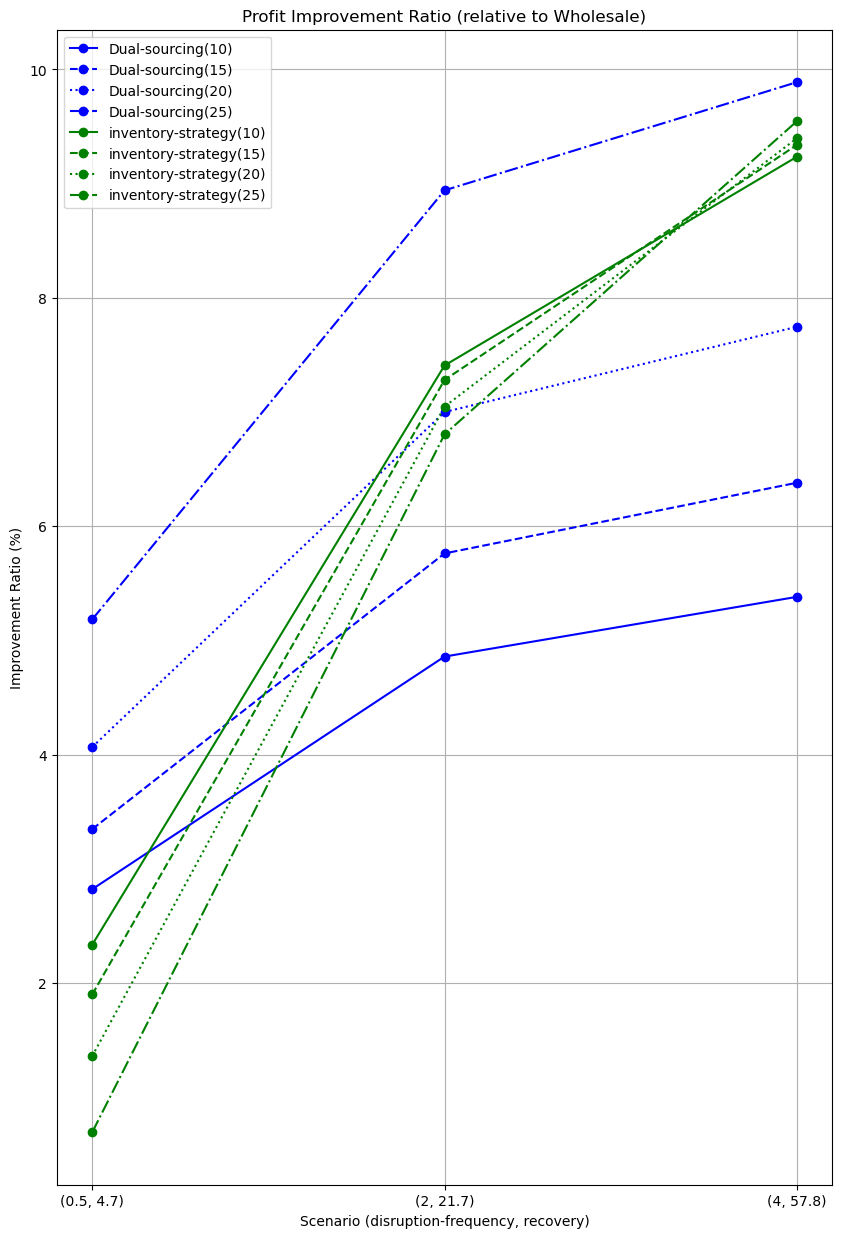

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 4.7), (2, 21.7), (4, 57.8)]
costs = [10, 15, 20, 25]  # ✅ 비용 리스트 업데이트
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {10: "-", 15: "--", 20: ":", 25: "-."}  # ✅ 10, 15, 20, 25 추가

# 데이터를 저장할 딕셔너리 (Profit 데이터)
data = {f"{strategy}({cost})": [] for strategy in strategies for cost in costs}

# CSV 파일 읽기 및 profit 데이터 저장
for strategy in strategies:
    for cost in costs:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_0.1_w{cost}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 1000  # profit 값을 1000으로 나눔
                data[f"{strategy}({cost})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

# 개선율 (Improvement) 계산 및 저장
improvement_data = {f"{strategy}({cost})": [] 
                    for strategy in strategies if strategy != "Wholesale" 
                    for cost in costs}

for strategy in strategies:
    if strategy == "Wholesale":
        continue
    for cost in costs:
        key = f"{strategy}({cost})"
        wholesale_key = f"Wholesale({cost})"
        for i in range(len(scenarios)):
            # Division-by-zero 방지
            if data[wholesale_key][i] == 0:
                improvement = 0
            else:
                improvement = ((data[key][i] - data[wholesale_key][i]) / data[wholesale_key][i]) * 100
            improvement_data[key].append(improvement)

print(improvement_data)

# 개선도 플롯 생성
plt.figure(figsize=(10, 15))
for strategy in strategies:
    if strategy == "Wholesale":
        continue
    for cost in costs:
        key = f"{strategy}({cost})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios],
                 improvement_data[key],
                 marker='o',
                 label=key,
                 color=colors[strategy],
                 linestyle=linestyles[cost])

# 플롯 꾸미기
plt.title("Profit Improvement Ratio (relative to Wholesale)")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Improvement Ratio (%)")
plt.legend()
plt.grid(True)
plt.show()


{'Dual-sourcing(10)': [np.float64(2.8208721889434445), np.float64(4.858061962048528), np.float64(5.380868448828593)], 'inventory-strategy(10)': [np.float64(2.334940460677013), np.float64(7.407209553021446), np.float64(9.234406570360271)]}


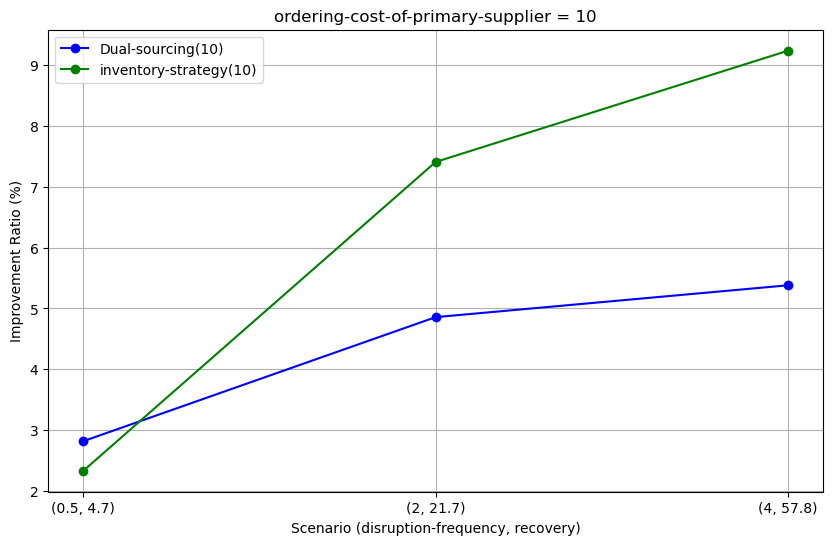

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 4.7), (2, 21.7), (4, 57.8)]
costs = [10]  
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {10: "-", 15: "--", 20: ":", 25: "-."}  

# 데이터를 저장할 딕셔너리 (Profit 데이터)
data = {f"{strategy}({cost})": [] for strategy in strategies for cost in costs}

# CSV 파일 읽기 및 profit 데이터 저장
for strategy in strategies:
    for cost in costs:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_0.1_w{cost}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 1000  # profit 값을 1000으로 나눔
                data[f"{strategy}({cost})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

# 개선율 (Improvement) 계산 및 저장
improvement_data = {f"{strategy}({cost})": [] 
                    for strategy in strategies if strategy != "Wholesale" 
                    for cost in costs}

for strategy in strategies:
    if strategy == "Wholesale":
        continue
    for cost in costs:
        key = f"{strategy}({cost})"
        wholesale_key = f"Wholesale({cost})"
        for i in range(len(scenarios)):
            # Division-by-zero 방지
            if data[wholesale_key][i] == 0:
                improvement = 0
            else:
                improvement = ((data[key][i] - data[wholesale_key][i]) / data[wholesale_key][i]) * 100
            improvement_data[key].append(improvement)

print(improvement_data)

# 개선도 플롯 생성
plt.figure(figsize=(10, 6))
for strategy in strategies:
    if strategy == "Wholesale":
        continue
    for cost in costs:
        key = f"{strategy}({cost})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios],
                 improvement_data[key],
                 marker='o',
                 label=key,
                 color=colors[strategy],
                 linestyle=linestyles[cost])

# 플롯 꾸미기
plt.title("ordering-cost-of-primary-supplier = 10")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Improvement Ratio (%)")
plt.legend()
plt.grid(True)
plt.show()


{'Dual-sourcing(15)': [np.float64(3.3467524986005666), np.float64(5.761295497959906), np.float64(6.38007300167984)], 'inventory-strategy(15)': [np.float64(1.8993415502609676), np.float64(7.28047370707545), np.float64(9.338493799970584)]}


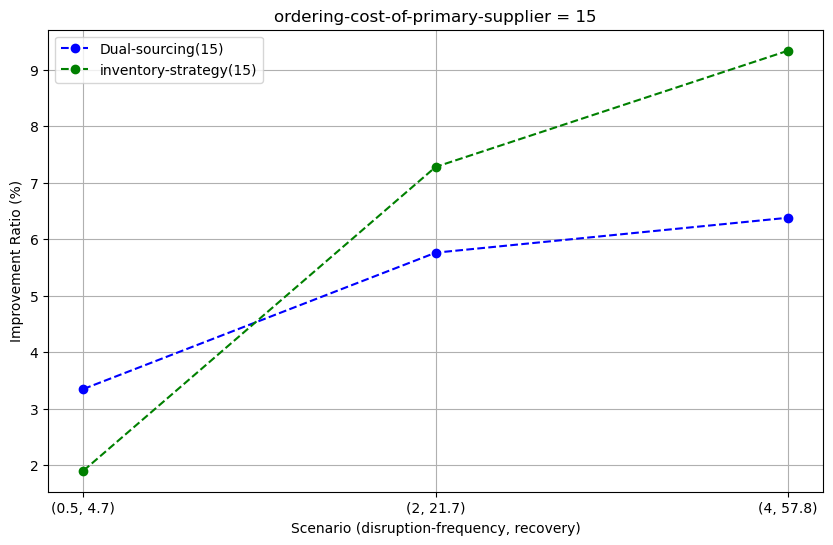

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 4.7), (2, 21.7), (4, 57.8)]
costs = [15]  
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {10: "-", 15: "--", 20: ":", 25: "-."}  

# 데이터를 저장할 딕셔너리 (Profit 데이터)
data = {f"{strategy}({cost})": [] for strategy in strategies for cost in costs}

# CSV 파일 읽기 및 profit 데이터 저장
for strategy in strategies:
    for cost in costs:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_0.1_w{cost}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 1000  # profit 값을 1000으로 나눔
                data[f"{strategy}({cost})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

# 개선율 (Improvement) 계산 및 저장
improvement_data = {f"{strategy}({cost})": [] 
                    for strategy in strategies if strategy != "Wholesale" 
                    for cost in costs}

for strategy in strategies:
    if strategy == "Wholesale":
        continue
    for cost in costs:
        key = f"{strategy}({cost})"
        wholesale_key = f"Wholesale({cost})"
        for i in range(len(scenarios)):
            # Division-by-zero 방지
            if data[wholesale_key][i] == 0:
                improvement = 0
            else:
                improvement = ((data[key][i] - data[wholesale_key][i]) / data[wholesale_key][i]) * 100
            improvement_data[key].append(improvement)

print(improvement_data)

# 개선도 플롯 생성
plt.figure(figsize=(10, 6))
for strategy in strategies:
    if strategy == "Wholesale":
        continue
    for cost in costs:
        key = f"{strategy}({cost})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios],
                 improvement_data[key],
                 marker='o',
                 label=key,
                 color=colors[strategy],
                 linestyle=linestyles[cost])

# 플롯 꾸미기
plt.title("ordering-cost-of-primary-supplier = 15")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Improvement Ratio (%)")
plt.legend()
plt.grid(True)
plt.show()

{'Dual-sourcing(20)': [np.float64(4.066061190361019), np.float64(6.999639946400271), np.float64(7.74580036678882)], 'inventory-strategy(20)': [np.float64(1.3596657258790243), np.float64(7.047168036841228), np.float64(9.396576259778504)]}


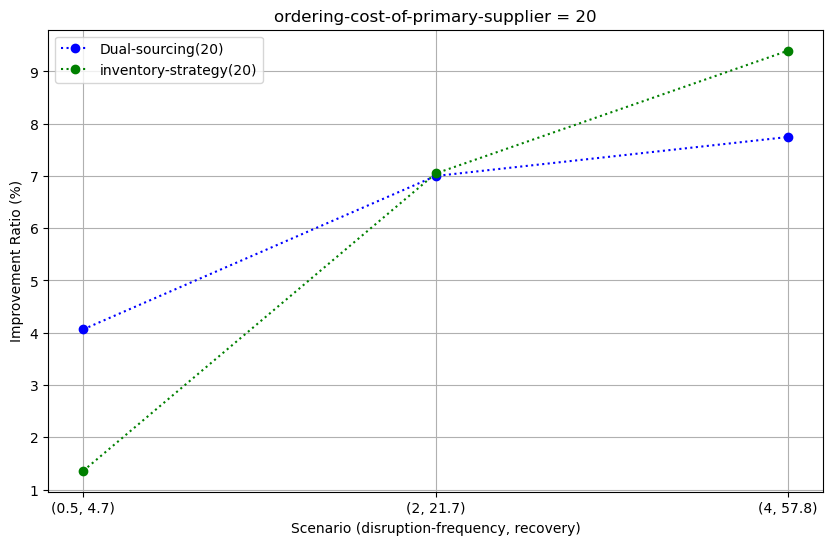

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 4.7), (2, 21.7), (4, 57.8)]
costs = [20]  
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {10: "-", 15: "--", 20: ":", 25: "-."}  

# 데이터를 저장할 딕셔너리 (Profit 데이터)
data = {f"{strategy}({cost})": [] for strategy in strategies for cost in costs}

# CSV 파일 읽기 및 profit 데이터 저장
for strategy in strategies:
    for cost in costs:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_0.1_w{cost}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 1000  # profit 값을 1000으로 나눔
                data[f"{strategy}({cost})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

# 개선율 (Improvement) 계산 및 저장
improvement_data = {f"{strategy}({cost})": [] 
                    for strategy in strategies if strategy != "Wholesale" 
                    for cost in costs}

for strategy in strategies:
    if strategy == "Wholesale":
        continue
    for cost in costs:
        key = f"{strategy}({cost})"
        wholesale_key = f"Wholesale({cost})"
        for i in range(len(scenarios)):
            # Division-by-zero 방지
            if data[wholesale_key][i] == 0:
                improvement = 0
            else:
                improvement = ((data[key][i] - data[wholesale_key][i]) / data[wholesale_key][i]) * 100
            improvement_data[key].append(improvement)

print(improvement_data)

# 개선도 플롯 생성
plt.figure(figsize=(10, 6))
for strategy in strategies:
    if strategy == "Wholesale":
        continue
    for cost in costs:
        key = f"{strategy}({cost})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios],
                 improvement_data[key],
                 marker='o',
                 label=key,
                 color=colors[strategy],
                 linestyle=linestyles[cost])

# 플롯 꾸미기
plt.title("ordering-cost-of-primary-supplier = 20")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Improvement Ratio (%)")
plt.legend()
plt.grid(True)
plt.show()


{'Dual-sourcing(25)': [np.float64(5.1840086468246644), np.float64(8.940959920852123), np.float64(9.887830608876772)], 'inventory-strategy(25)': [np.float64(0.6926220118094638), np.float64(6.8036739054126), np.float64(9.545519636585517)]}


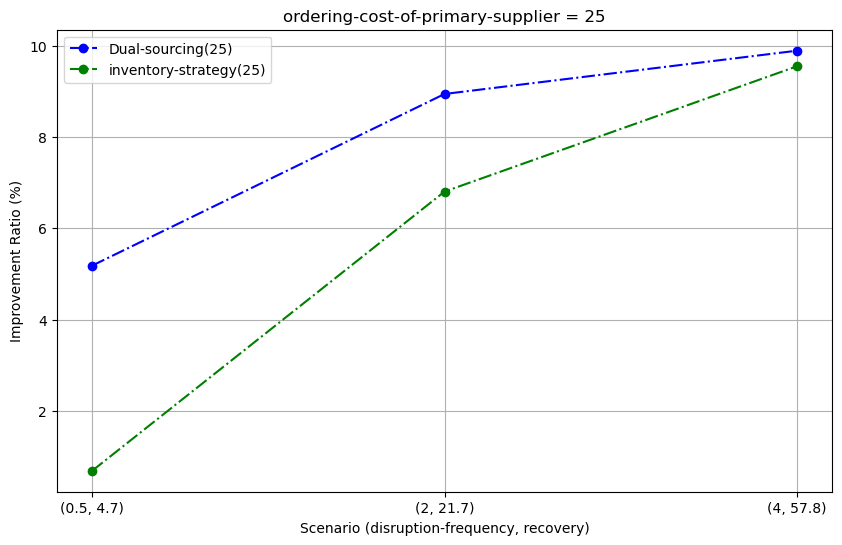

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 4.7), (2, 21.7), (4, 57.8)]
costs = [25]  
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {10: "-", 15: "--", 20: ":", 25: "-."}  

# 데이터를 저장할 딕셔너리 (Profit 데이터)
data = {f"{strategy}({cost})": [] for strategy in strategies for cost in costs}

# CSV 파일 읽기 및 profit 데이터 저장
for strategy in strategies:
    for cost in costs:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_0.1_w{cost}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 1000  # profit 값을 1000으로 나눔
                data[f"{strategy}({cost})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

# 개선율 (Improvement) 계산 및 저장
improvement_data = {f"{strategy}({cost})": [] 
                    for strategy in strategies if strategy != "Wholesale" 
                    for cost in costs}

for strategy in strategies:
    if strategy == "Wholesale":
        continue
    for cost in costs:
        key = f"{strategy}({cost})"
        wholesale_key = f"Wholesale({cost})"
        for i in range(len(scenarios)):
            # Division-by-zero 방지
            if data[wholesale_key][i] == 0:
                improvement = 0
            else:
                improvement = ((data[key][i] - data[wholesale_key][i]) / data[wholesale_key][i]) * 100
            improvement_data[key].append(improvement)

print(improvement_data)

# 개선도 플롯 생성
plt.figure(figsize=(10, 6))
for strategy in strategies:
    if strategy == "Wholesale":
        continue
    for cost in costs:
        key = f"{strategy}({cost})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios],
                 improvement_data[key],
                 marker='o',
                 label=key,
                 color=colors[strategy],
                 linestyle=linestyles[cost])

# 플롯 꾸미기
plt.title("ordering-cost-of-primary-supplier = 25")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Improvement Ratio (%)")
plt.legend()
plt.grid(True)
plt.show()

## CV 변화 (0.1, 0.3, 0.5)

{'Dual-sourcing(0.1)': [np.float64(126075.35), np.float64(129717.9), np.float64(130898.625)], 'Dual-sourcing(0.3)': [np.float64(107552.25), np.float64(111047.3), np.float64(112258.55)], 'Dual-sourcing(0.5)': [np.float64(89348.9), np.float64(92586.3), np.float64(93840.725)], 'inventory-strategy(0.1)': [np.float64(122800.84288454732), np.float64(129772.18423081384), np.float64(132901.7082692948)], 'inventory-strategy(0.3)': [np.float64(104311.52153837548), np.float64(111020.08288470724), np.float64(114163.64961529276)], 'inventory-strategy(0.5)': [np.float64(86069.9576921692), np.float64(92564.9424998836), np.float64(95686.5298076471)], 'Wholesale(0.1)': [np.float64(121149.8), np.float64(121231.95), np.float64(121486.8)], 'Wholesale(0.3)': [np.float64(102704.9), np.float64(102638.05), np.float64(102859.95)], 'Wholesale(0.5)': [np.float64(84043.05), np.float64(84343.6), np.float64(84702.45)]}


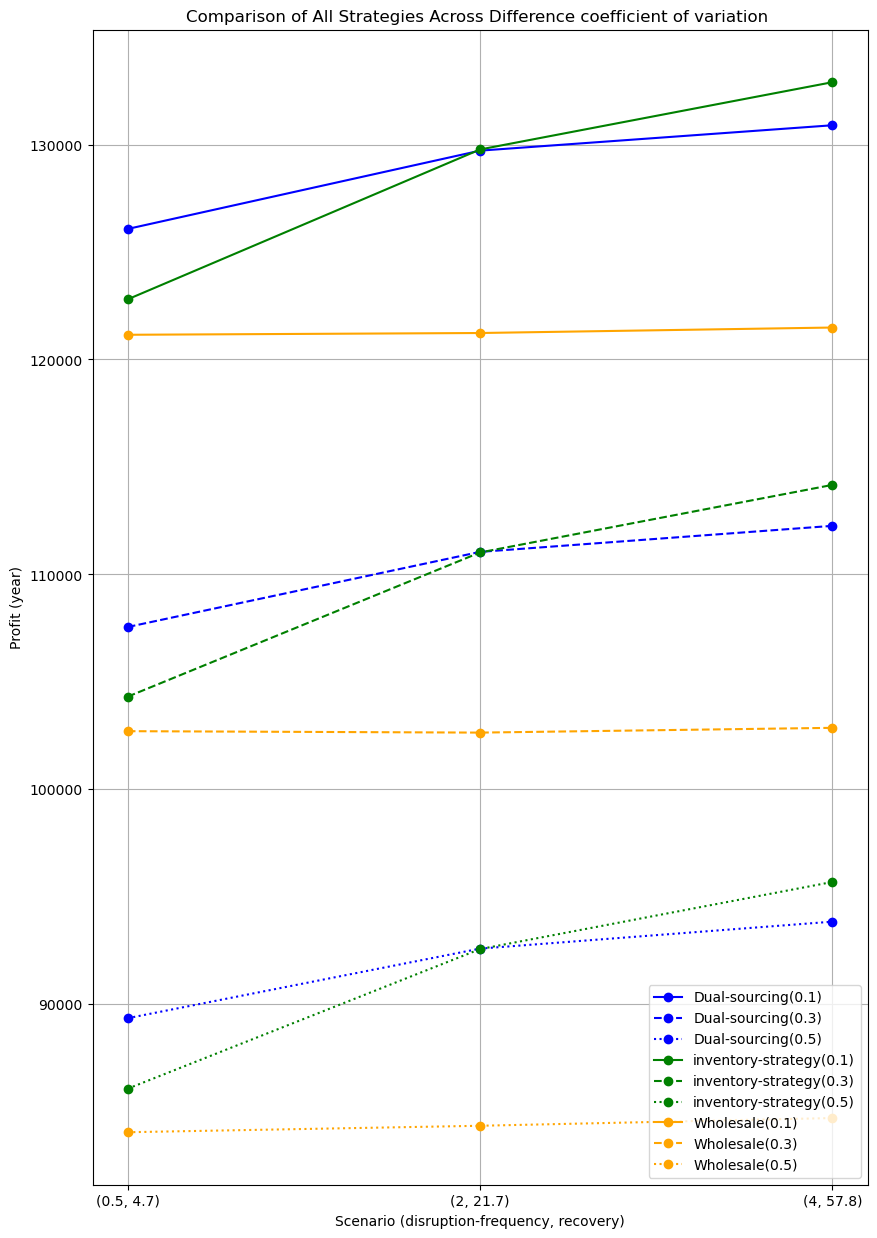

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 4.7), (2, 21.7), (4, 57.8)]
all_cv = [0.1, 0.3, 0.5]
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {0.1: "-", 0.3: "--", 0.5: ":"}

# 데이터를 저장할 딕셔너리
data = {f"{strategy}({cv})": [] for strategy in strategies for cv in all_cv}

# 데이터 읽기 및 처리
for strategy in strategies:
    for cv in all_cv:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_c{cv}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 1000
                data[f"{strategy}({cv})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

print(data)

# 라인 플롯 생성
plt.figure(figsize=(10, 15))

for strategy in strategies:
    for cv in all_cv:
        label = f"{strategy}({cv})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios], data[label],
                 marker='o', label=label, color=colors[strategy], linestyle=linestyles[cv])

# 플롯 꾸미기
plt.title("Comparison of All Strategies Across Difference coefficient of variation ")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()

{'Dual-sourcing(0.1)': [np.float64(126075.35), np.float64(129717.9), np.float64(130898.625)], 'inventory-strategy(0.1)': [np.float64(122800.84288454732), np.float64(129772.18423081384), np.float64(132901.7082692948)], 'Wholesale(0.1)': [np.float64(121149.8), np.float64(121231.95), np.float64(121486.8)]}


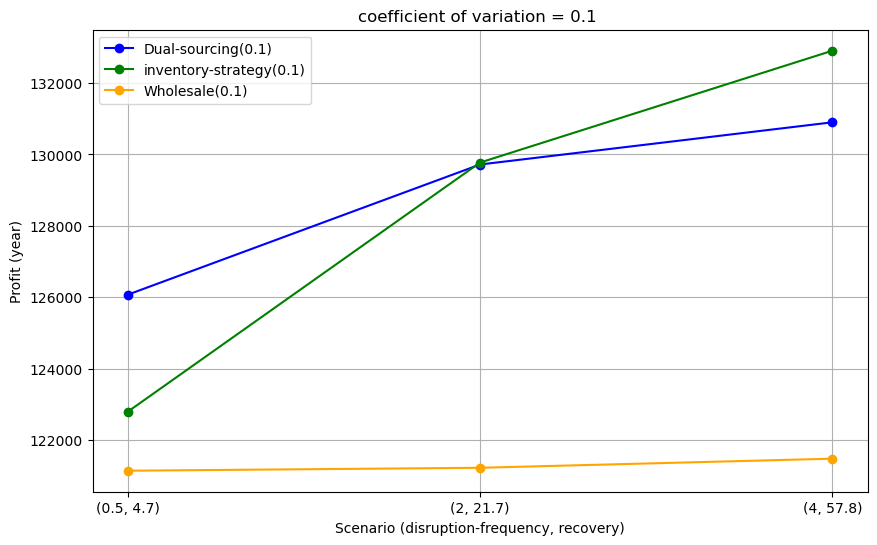

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 4.7), (2, 21.7), (4, 57.8)]
all_cv = [0.1]
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {0.1: "-", 0.3: "--", 0.5: ":"}

# 데이터를 저장할 딕셔너리
data = {f"{strategy}({cv})": [] for strategy in strategies for cv in all_cv}

# 데이터 읽기 및 처리
for strategy in strategies:
    for cv in all_cv:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_c{cv}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 1000
                data[f"{strategy}({cv})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

print(data)

# 라인 플롯 생성
plt.figure(figsize=(10, 6))

for strategy in strategies:
    for cv in all_cv:
        label = f"{strategy}({cv})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios], data[label],
                 marker='o', label=label, color=colors[strategy], linestyle=linestyles[cv])

# 플롯 꾸미기
plt.title("coefficient of variation = 0.1 ")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()

{'Dual-sourcing(0.3)': [np.float64(107552.25), np.float64(111047.3), np.float64(112258.55)], 'inventory-strategy(0.3)': [np.float64(104311.52153837548), np.float64(111020.08288470724), np.float64(114163.64961529276)], 'Wholesale(0.3)': [np.float64(102704.9), np.float64(102638.05), np.float64(102859.95)]}


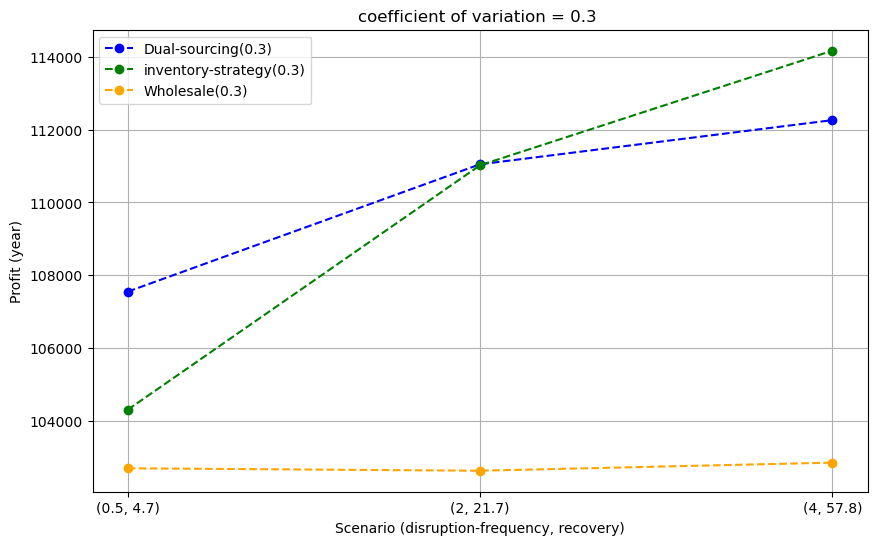

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 4.7), (2, 21.7), (4, 57.8)]
all_cv = [0.3]
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {0.1: "-", 0.3: "--", 0.5: ":"}

# 데이터를 저장할 딕셔너리
data = {f"{strategy}({cv})": [] for strategy in strategies for cv in all_cv}

# 데이터 읽기 및 처리
for strategy in strategies:
    for cv in all_cv:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_c{cv}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 1000
                data[f"{strategy}({cv})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

print(data)

# 라인 플롯 생성
plt.figure(figsize=(10, 6))

for strategy in strategies:
    for cv in all_cv:
        label = f"{strategy}({cv})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios], data[label],
                 marker='o', label=label, color=colors[strategy], linestyle=linestyles[cv])

# 플롯 꾸미기
plt.title("coefficient of variation = 0.3 ")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()

{'Dual-sourcing(0.5)': [np.float64(89348.9), np.float64(92586.3), np.float64(93840.725)], 'inventory-strategy(0.5)': [np.float64(86069.9576921692), np.float64(92564.9424998836), np.float64(95686.5298076471)], 'Wholesale(0.5)': [np.float64(84043.05), np.float64(84343.6), np.float64(84702.45)]}


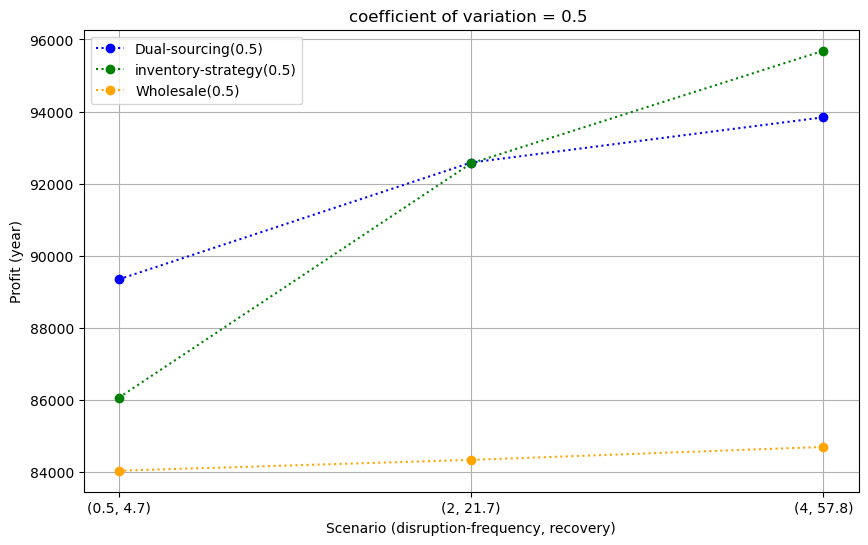

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 4.7), (2, 21.7), (4, 57.8)]
all_cv = [0.5]
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {0.1: "-", 0.3: "--", 0.5: ":"}

# 데이터를 저장할 딕셔너리
data = {f"{strategy}({cv})": [] for strategy in strategies for cv in all_cv}

# 데이터 읽기 및 처리
for strategy in strategies:
    for cv in all_cv:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_c{cv}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 1000
                data[f"{strategy}({cv})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

print(data)

# 라인 플롯 생성
plt.figure(figsize=(10, 6))

for strategy in strategies:
    for cv in all_cv:
        label = f"{strategy}({cv})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios], data[label],
                 marker='o', label=label, color=colors[strategy], linestyle=linestyles[cv])

# 플롯 꾸미기
plt.title("coefficient of variation = 0.5 ")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Profit (year)")
plt.legend()
plt.grid(True)

# 플롯 표시
plt.show()

{'Dual-sourcing(0.1)': [np.float64(4.06566911377485), np.float64(6.999763676159625), np.float64(7.747199695769415)], 'Dual-sourcing(0.3)': [np.float64(4.719687181429519), np.float64(8.193111618936642), np.float64(9.13727840622128)], 'Dual-sourcing(0.5)': [np.float64(6.313252553304515), np.float64(9.772762841519684), np.float64(10.78867848568726)], 'inventory-strategy(0.1)': [np.float64(1.3628110690626989), np.float64(7.044540841596499), np.float64(9.396007030636074)], 'inventory-strategy(0.3)': [np.float64(1.5643085562378132), np.float64(8.16659405036167), np.float64(10.989408040051313)], 'inventory-strategy(0.5)': [np.float64(2.4117493262907557), np.float64(9.747440825247674), np.float64(12.967841907343999)]}


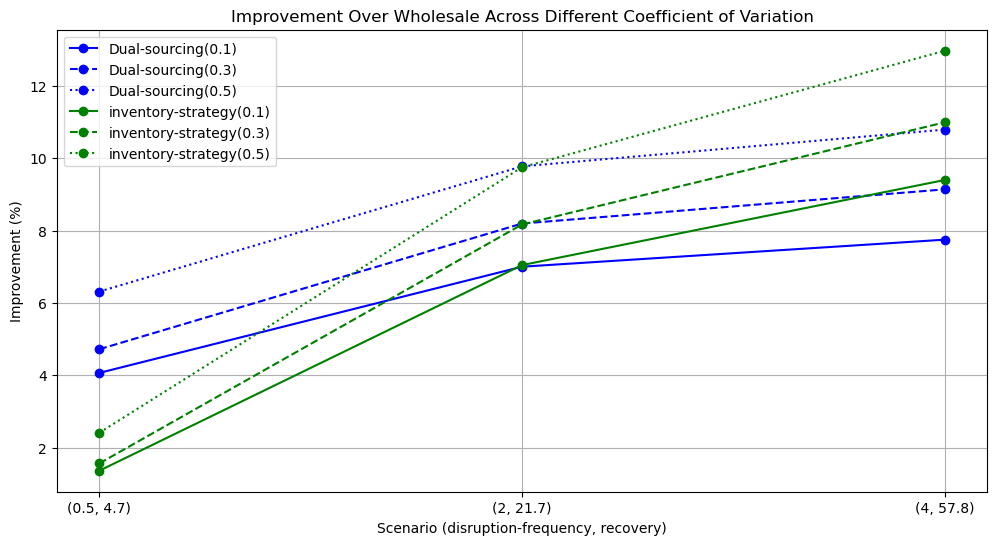

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 기본 설정
scenarios = [(0.5, 4.7), (2, 21.7), (4, 57.8)]
all_cv = [0.1, 0.3, 0.5]
strategies = ["Dual-sourcing", "inventory-strategy", "Wholesale"]

# 라벨과 스타일 설정
colors = {"Dual-sourcing": "blue", "inventory-strategy": "green", "Wholesale": "orange"}
linestyles = {0.1: "-", 0.3: "--", 0.5: ":"}

# 데이터를 저장할 딕셔너리
data = {f"{strategy}({cv})": [] for strategy in strategies for cv in all_cv}

# 데이터 읽기 및 처리
for strategy in strategies:
    for cv in all_cv:
        for scenario in scenarios:
            file_name = f"Data_{strategy}_{scenario[0]}_{scenario[1]}_c{cv}.csv"
            try:
                df = pd.read_csv(file_name)
                last_profit = df['profit'].iloc[-1] / 1000
                data[f"{strategy}({cv})"].append(last_profit)
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

# Wholesale 데이터를 따로 저장
wholesale_data = {cv: data[f"Wholesale({cv})"] for cv in all_cv}

# 개선율(Improvement %) 계산
improvement_data = {f"{strategy}({cv})": [] for strategy in ["Dual-sourcing", "inventory-strategy"] for cv in all_cv}

for cv in all_cv:
    for strategy in ["Dual-sourcing", "inventory-strategy"]:
        strategy_key = f"{strategy}({cv})"
        wholesale_key = f"Wholesale({cv})"
        for i in range(len(scenarios)):
            try:
                improvement = ((data[strategy_key][i] - wholesale_data[cv][i]) / wholesale_data[cv][i]) * 100
                improvement_data[strategy_key].append(improvement)
            except ZeroDivisionError:
                improvement_data[strategy_key].append(0)

print(improvement_data)

plt.figure(figsize=(12, 6))
for strategy in ["Dual-sourcing", "inventory-strategy"]:
    for cv in all_cv:
        label = f"{strategy}({cv})"
        plt.plot([f"({s[0]}, {s[1]})" for s in scenarios], improvement_data[label],
                 marker='o', label=label, color=colors[strategy], linestyle=linestyles[cv])

plt.title("Improvement Over Wholesale Across Different Coefficient of Variation")
plt.xlabel("Scenario (disruption-frequency, recovery)")
plt.ylabel("Improvement (%)")
plt.legend()
plt.grid(True)
plt.show()
